In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
covid = pd.read_csv('/content/drive/MyDrive/covid_19_data.csv')
covid.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
18322,18323,04/24/2020,Wyoming,US,2020-04-25 06:31:19,473.0,7.0,0.0
18323,18324,04/24/2020,Xinjiang,Mainland China,2020-04-25 06:31:19,76.0,3.0,73.0
18324,18325,04/24/2020,Yukon,Canada,2020-04-25 06:31:19,11.0,0.0,0.0
18325,18326,04/24/2020,Yunnan,Mainland China,2020-04-25 06:31:19,185.0,2.0,180.0
18326,18327,04/24/2020,Zhejiang,Mainland China,2020-04-25 06:31:19,1268.0,1.0,1256.0


## Exploratory Data Anlysis

In [125]:
print("Size/Shape of the dataset",covid.shape)
print("Checking for null values: ",covid.isnull().sum())
print("Checking Data-type",covid.dtypes)

Size/Shape of the dataset (18327, 8)
Checking for null values:  SNo                   0
ObservationDate       0
Province/State     9277
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64
Checking Data-type SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object


In [126]:
#Dropping the column
covid.drop(["SNo","Last Update"],axis = 1,inplace=True)

In [127]:
covid.sample(5)

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
4019,03/08/2020,Guangxi,Mainland China,252.0,2.0,223.0
14577,04/13/2020,NaN,Kuwait,1300.0,2.0,150.0
9462,03/28/2020,NaN,Denmark,2201.0,65.0,1.0
12588,04/07/2020,NaN,Botswana,6.0,1.0,0.0
16365,04/18/2020,Oregon,US,1844.0,72.0,0.0


In [128]:
covid.isnull().sum()

ObservationDate       0
Province/State     9277
Country/Region        0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

In [129]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18327 entries, 0 to 18326
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ObservationDate  18327 non-null  object 
 1   Province/State   9050 non-null   object 
 2   Country/Region   18327 non-null  object 
 3   Confirmed        18327 non-null  float64
 4   Deaths           18327 non-null  float64
 5   Recovered        18327 non-null  float64
dtypes: float64(3), object(3)
memory usage: 859.2+ KB


In [130]:
covid['Country/Region'].unique()

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'Singapore', 'Philippines', 'Malaysia',
       'Vietnam', 'Australia', 'Mexico', 'Brazil', 'Colombia', 'France',
       'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast',
       'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy',
       'UK', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Others', 'Egypt',
       'Iran', 'Israel', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan',
       'Bahrain', 'Kuwait', 'Austria', 'Algeria', 'Croatia',
       'Switzerland', 'Pakistan', 'Georgia', 'Greece', 'North Macedonia',
       'Norway', 'Romania', 'Denmark', 'Estonia', 'Netherlands',
       'San Marino', ' Azerbaijan', 'Belarus', 'Iceland', 'Lithuania',
       'New Zealand', 'Nigeria', 'North Ireland', 'Ireland', 'Luxembourg',
       'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Czech Republic',
       'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal',
       'Andorra', 'Latvia

## Comparing between Pakistan and Indian Cases

In [131]:
# Pak Cases
df = covid[covid['Country/Region']=='Pakistan']
pak_last10 = df.tail(10)
pak_last10

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
15253,04/15/2020,NaN,Pakistan,6383.0,111.0,1446.0
15573,04/16/2020,NaN,Pakistan,6919.0,128.0,1645.0
15893,04/17/2020,NaN,Pakistan,7025.0,135.0,1765.0
16213,04/18/2020,NaN,Pakistan,7638.0,143.0,1832.0
16533,04/19/2020,NaN,Pakistan,8348.0,168.0,1868.0
16853,04/20/2020,NaN,Pakistan,8418.0,176.0,1970.0
17173,04/21/2020,NaN,Pakistan,9565.0,201.0,2073.0
17493,04/22/2020,NaN,Pakistan,10076.0,212.0,2156.0
17812,04/23/2020,NaN,Pakistan,11155.0,237.0,2527.0
18132,04/24/2020,NaN,Pakistan,11940.0,253.0,2755.0


2022-11-13 14:23:59,388 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2022-11-13 14:23:59,403 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


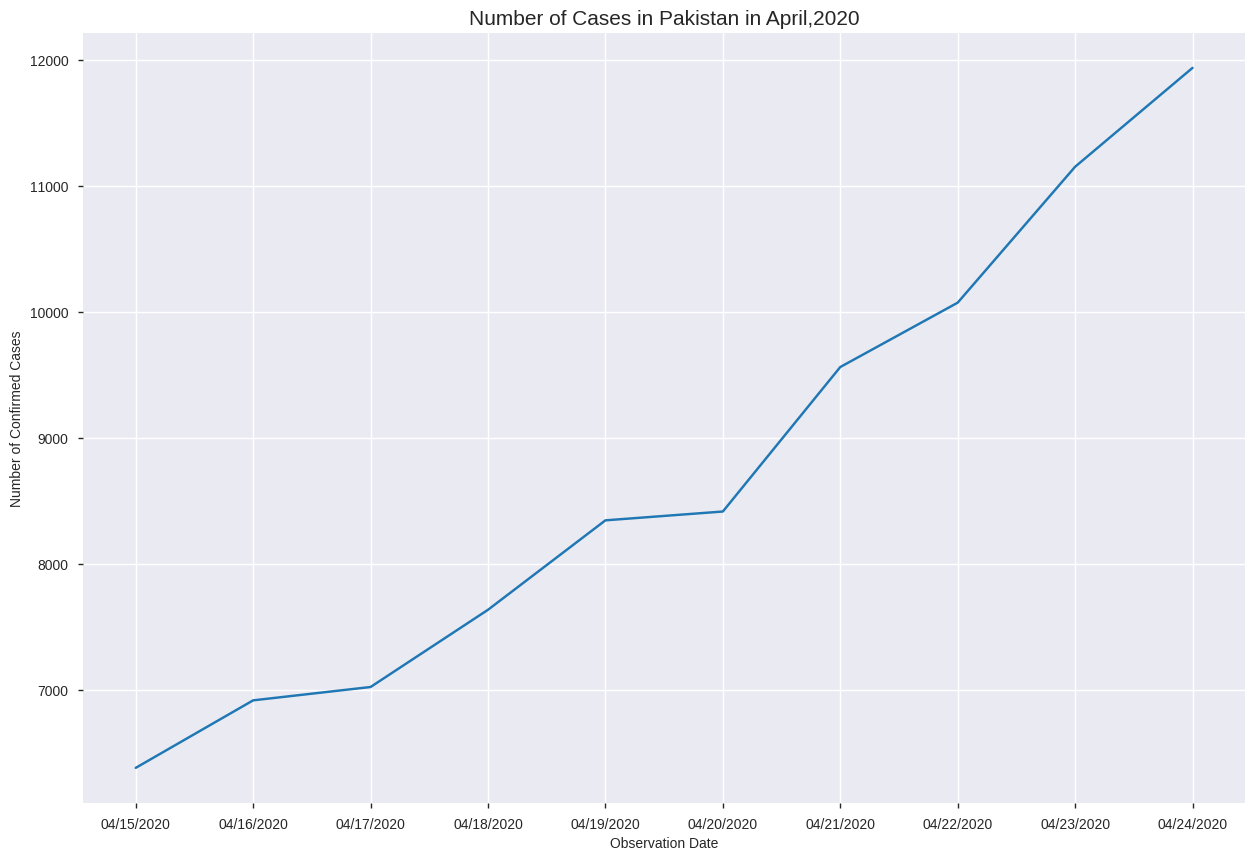

In [132]:
plt.figure(figsize = (15,10))
sns.lineplot(x = 'ObservationDate', y = 'Confirmed', data = pak_last10)
plt.xlabel('Observation Date',fontsize = 10)
plt.ylabel('Number of Confirmed Cases',fontsize = 10)
plt.title('Number of Cases in Pakistan in April,2020', fontsize = 15)
plt.show()

<b> The result shows continuous increase in number of cases in April, 2020 in Pakistan

In [133]:
# Indian Cases
df1 = covid[covid['Country/Region']=='India']
ind_last10 = df1.tail(10)
ind_last10

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
15203,04/15/2020,NaN,India,12322.0,405.0,1432.0
15523,04/16/2020,NaN,India,13430.0,448.0,1768.0
15843,04/17/2020,NaN,India,14352.0,486.0,2041.0
16163,04/18/2020,NaN,India,15722.0,521.0,2463.0
16483,04/19/2020,NaN,India,17615.0,559.0,2854.0
16803,04/20/2020,NaN,India,18539.0,592.0,3273.0
17123,04/21/2020,NaN,India,20080.0,645.0,3975.0
17443,04/22/2020,NaN,India,21370.0,681.0,4370.0
17762,04/23/2020,NaN,India,23077.0,721.0,5012.0
18082,04/24/2020,NaN,India,24530.0,780.0,5498.0


2022-11-13 14:23:59,891 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2022-11-13 14:23:59,899 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


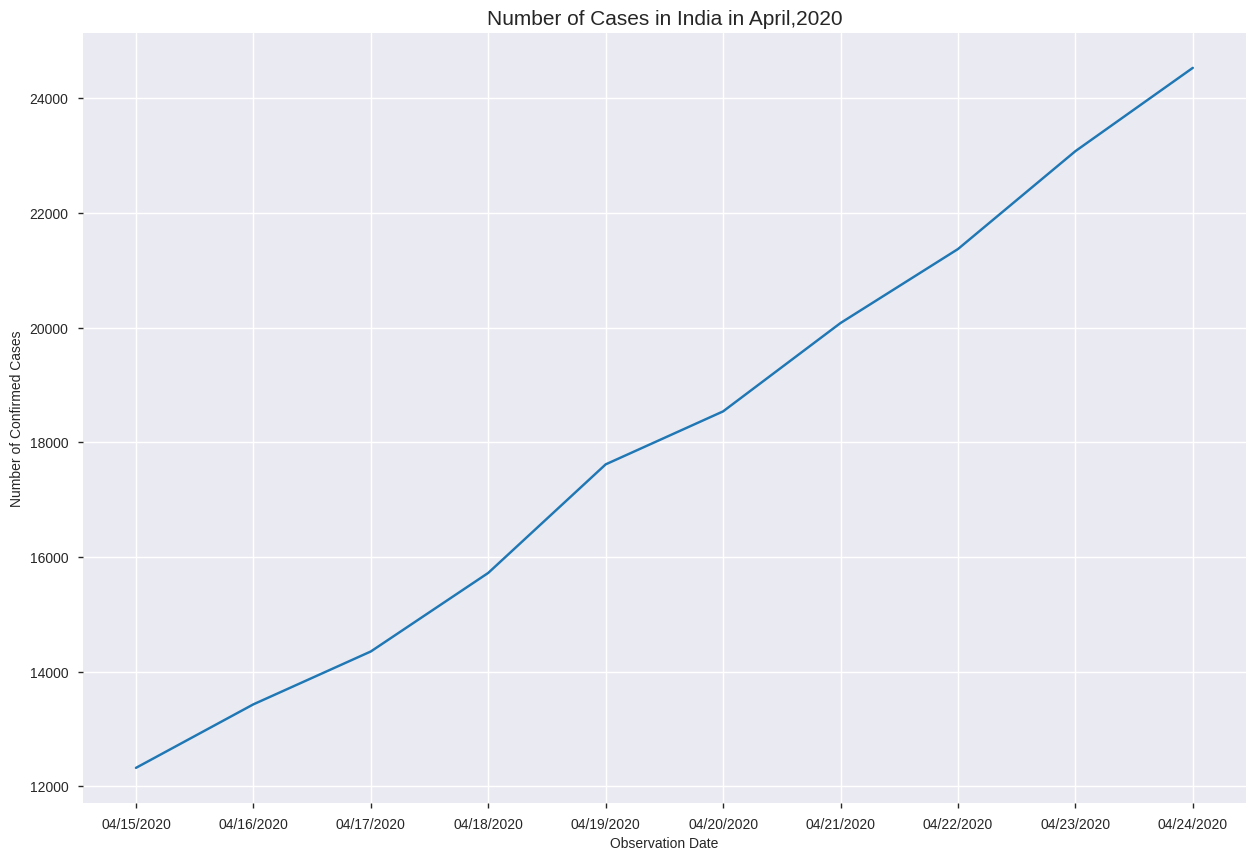

In [134]:
plt.figure(figsize = (15,10))
sns.lineplot(x = 'ObservationDate', y = 'Confirmed', data = ind_last10)
plt.xlabel('Observation Date',fontsize = 10)
plt.ylabel('Number of Confirmed Cases',fontsize = 10)
plt.title('Number of Cases in India in April,2020', fontsize = 15)
plt.show()

<b> The above result shows that increase in number of cases in India were double than that of Pakistan

In [135]:
pak_ind = covid[(covid['Country/Region']=='Pakistan') | (covid['Country/Region']=='India') ]
pak_ind

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
430,01/30/2020,NaN,India,1.0,0.0,0.0
491,01/31/2020,NaN,India,1.0,0.0,0.0
547,02/01/2020,NaN,India,1.0,0.0,0.0
607,02/02/2020,NaN,India,2.0,0.0,0.0
672,02/03/2020,NaN,India,3.0,0.0,0.0
...,...,...,...,...,...,...
17493,04/22/2020,NaN,Pakistan,10076.0,212.0,2156.0
17762,04/23/2020,NaN,India,23077.0,721.0,5012.0
17812,04/23/2020,NaN,Pakistan,11155.0,237.0,2527.0
18082,04/24/2020,NaN,India,24530.0,780.0,5498.0


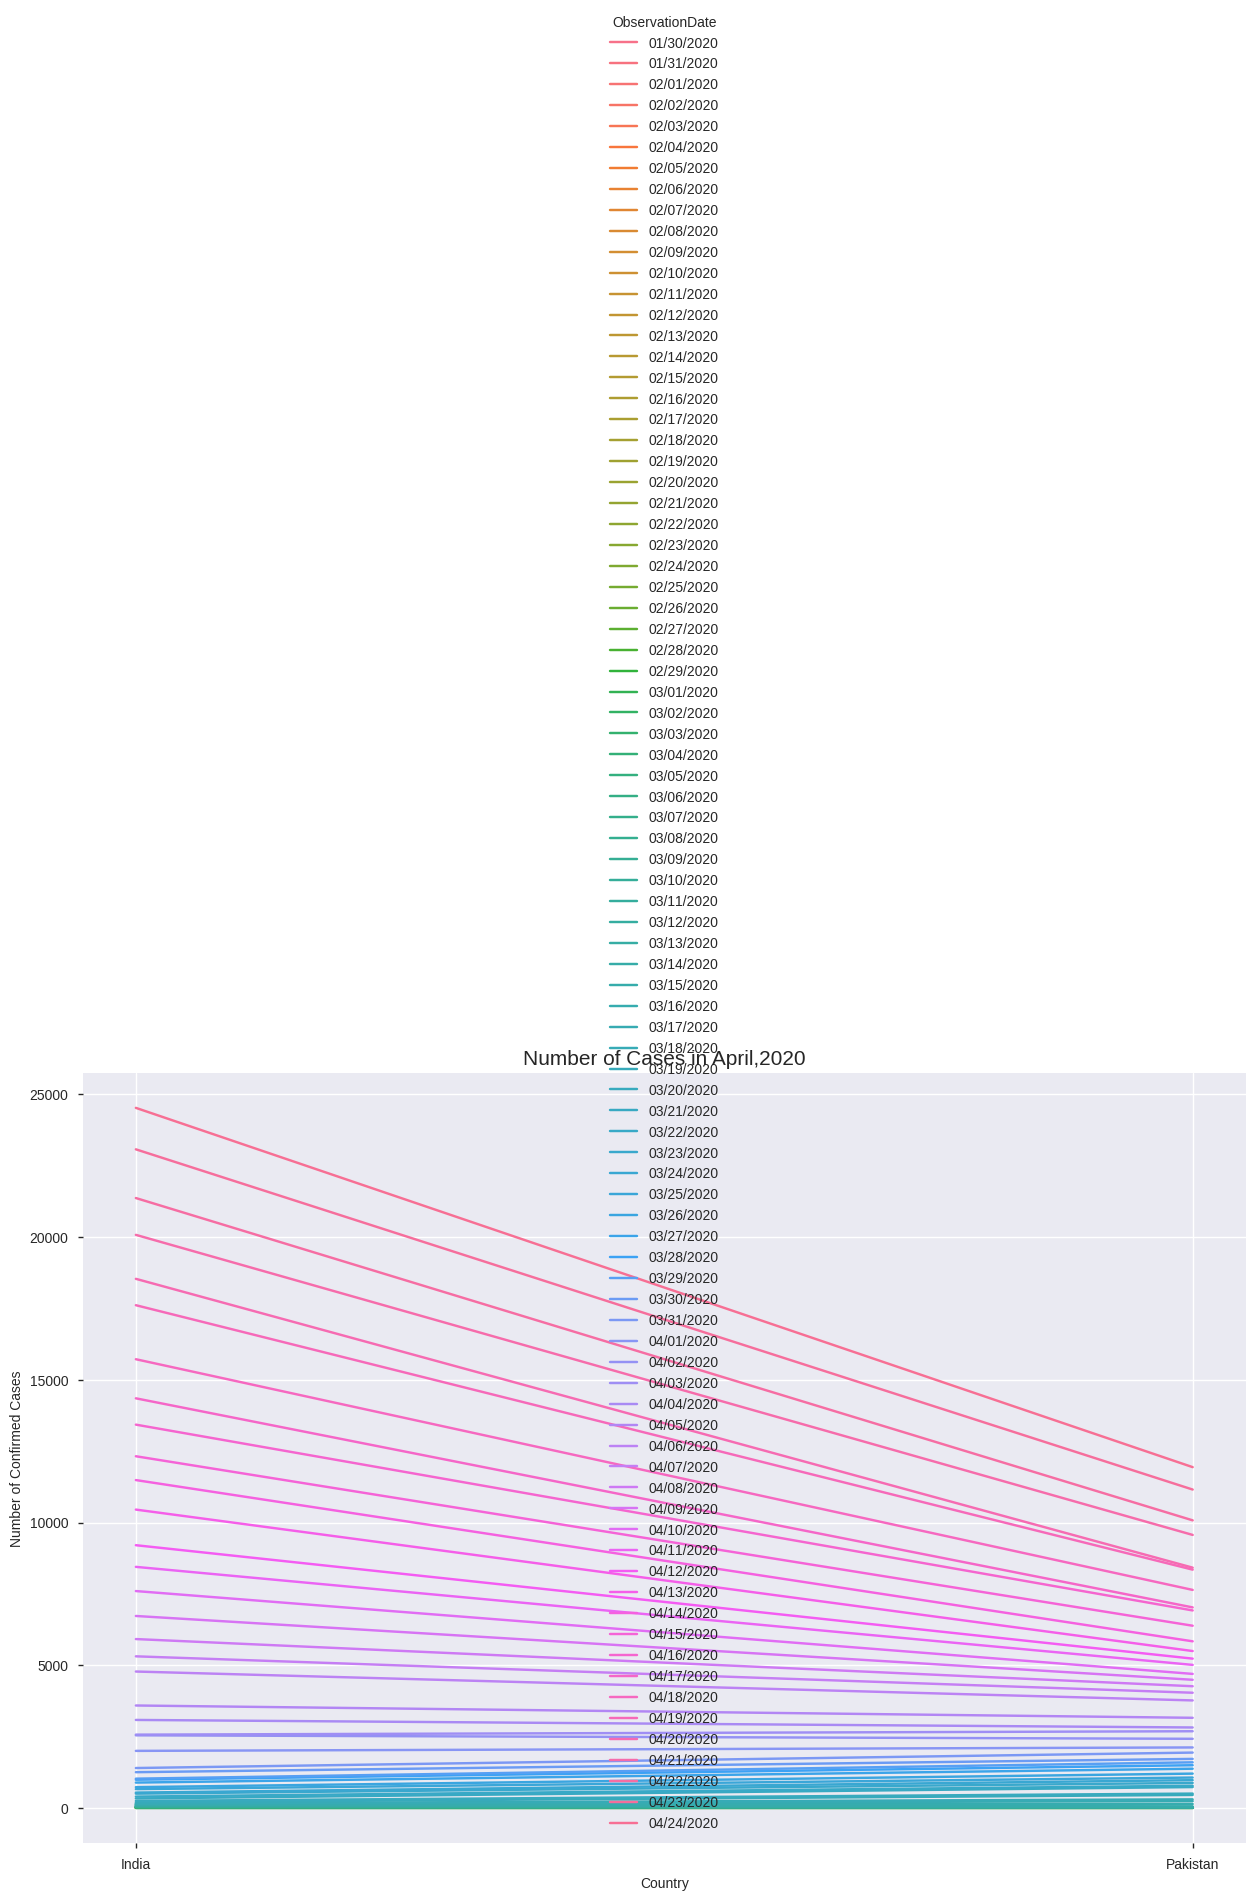

In [136]:
plt.figure(figsize = (15,10))
sns.lineplot(x = 'Country/Region', y = 'Confirmed', data = pak_ind, hue ='ObservationDate')
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Number of Confirmed Cases',fontsize = 10)
plt.title('Number of Cases in April,2020', fontsize = 15)
plt.show()

In [137]:
# Getting Last Day Cases
last_day = covid[covid['ObservationDate']=='04/24/2020']
last_day.head()

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
18008,04/24/2020,NaN,Afghanistan,1351.0,43.0,188.0
18009,04/24/2020,NaN,Albania,678.0,27.0,394.0
18010,04/24/2020,NaN,Algeria,3127.0,415.0,1408.0
18011,04/24/2020,NaN,Andorra,731.0,40.0,344.0
18012,04/24/2020,NaN,Angola,25.0,2.0,6.0


In [138]:
# Sorting data w.r.t confirmed cases 
last_day_max_cases = last_day.sort_values(by = 'Confirmed', ascending = False)
last_day_max_cases.head()

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
18272,04/24/2020,New York,US,271590.0,21411.0,0.0
18161,04/24/2020,NaN,Spain,219764.0,22524.0,92355.0
18088,04/24/2020,NaN,Italy,192994.0,25969.0,60498.0
18065,04/24/2020,NaN,France,158636.0,22245.0,43493.0
18069,04/24/2020,NaN,Germany,154999.0,5760.0,109800.0


<b> The above result shows that US experienced maximum number of confirmed cases on 04/24/2020

In [139]:
# Sorting data w.r.t confirmed cases 
last_day_max_deaths = last_day.sort_values(by = 'Deaths', ascending = False)
last_day_max_deaths.head()

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
18088,04/24/2020,NaN,Italy,192994.0,25969.0,60498.0
18161,04/24/2020,NaN,Spain,219764.0,22524.0,92355.0
18065,04/24/2020,NaN,France,158636.0,22245.0,43493.0
18272,04/24/2020,New York,US,271590.0,21411.0,0.0
18176,04/24/2020,NaN,UK,143464.0,19506.0,0.0


<b>The above result shows that Italy experienced maximum number of deaths on 04/24/2020

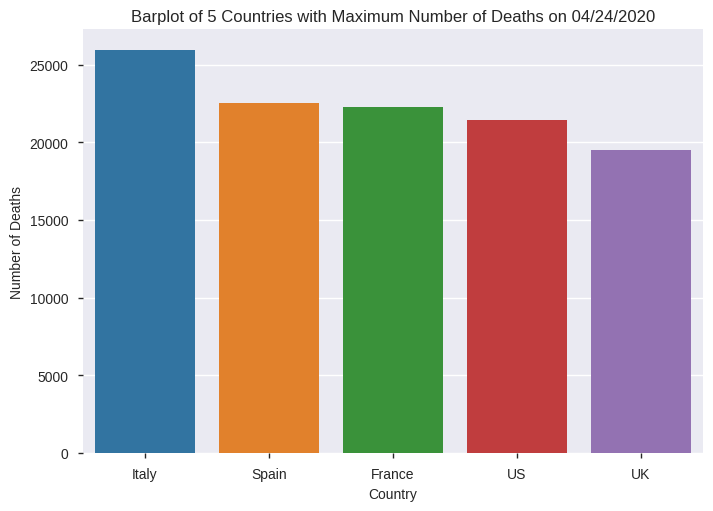

In [140]:
# Barplot of countries with maximum number of deaths on 04/24/2020
sns.barplot(x = 'Country/Region', y = 'Deaths', data = last_day_max_deaths[:5])
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Number of Deaths',fontsize = 10)
plt.title('Barplot of 5 Countries with Maximum Number of Deaths on 04/24/2020', fontsize = 12)
plt.show()

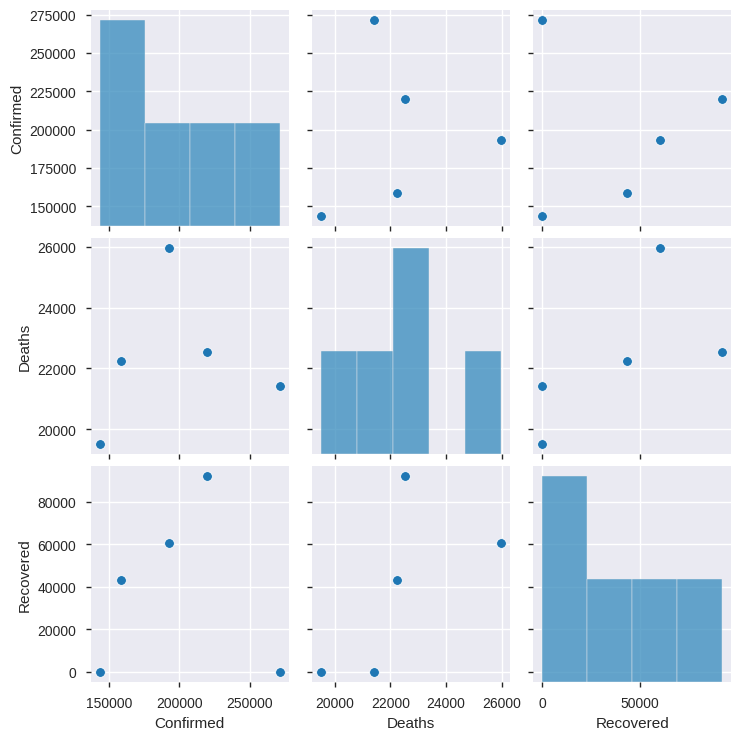

In [141]:
sns.pairplot(last_day_max_deaths[:5])

## Automatic Visualization Libraries

## 1 - AutoViz

In [142]:
!pip install autoviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [143]:
from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()

filename = "/content/drive/MyDrive/covid_19_data.csv"
sep = ","
dft = AV.AutoViz(
    filename,
    sep=",",
    depVar="",
    dfte=None,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
)

Output hidden; open in https://colab.research.google.com to view.

## 2 - Klib

In [144]:
! pip install klib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
  Attempting uninstall: Jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatible.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.


In [145]:
import klib

2022-11-13 14:25:35,741 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2022-11-13 14:25:35,745 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2022-11-13 14:25:35,755 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


GridSpec(6, 3)

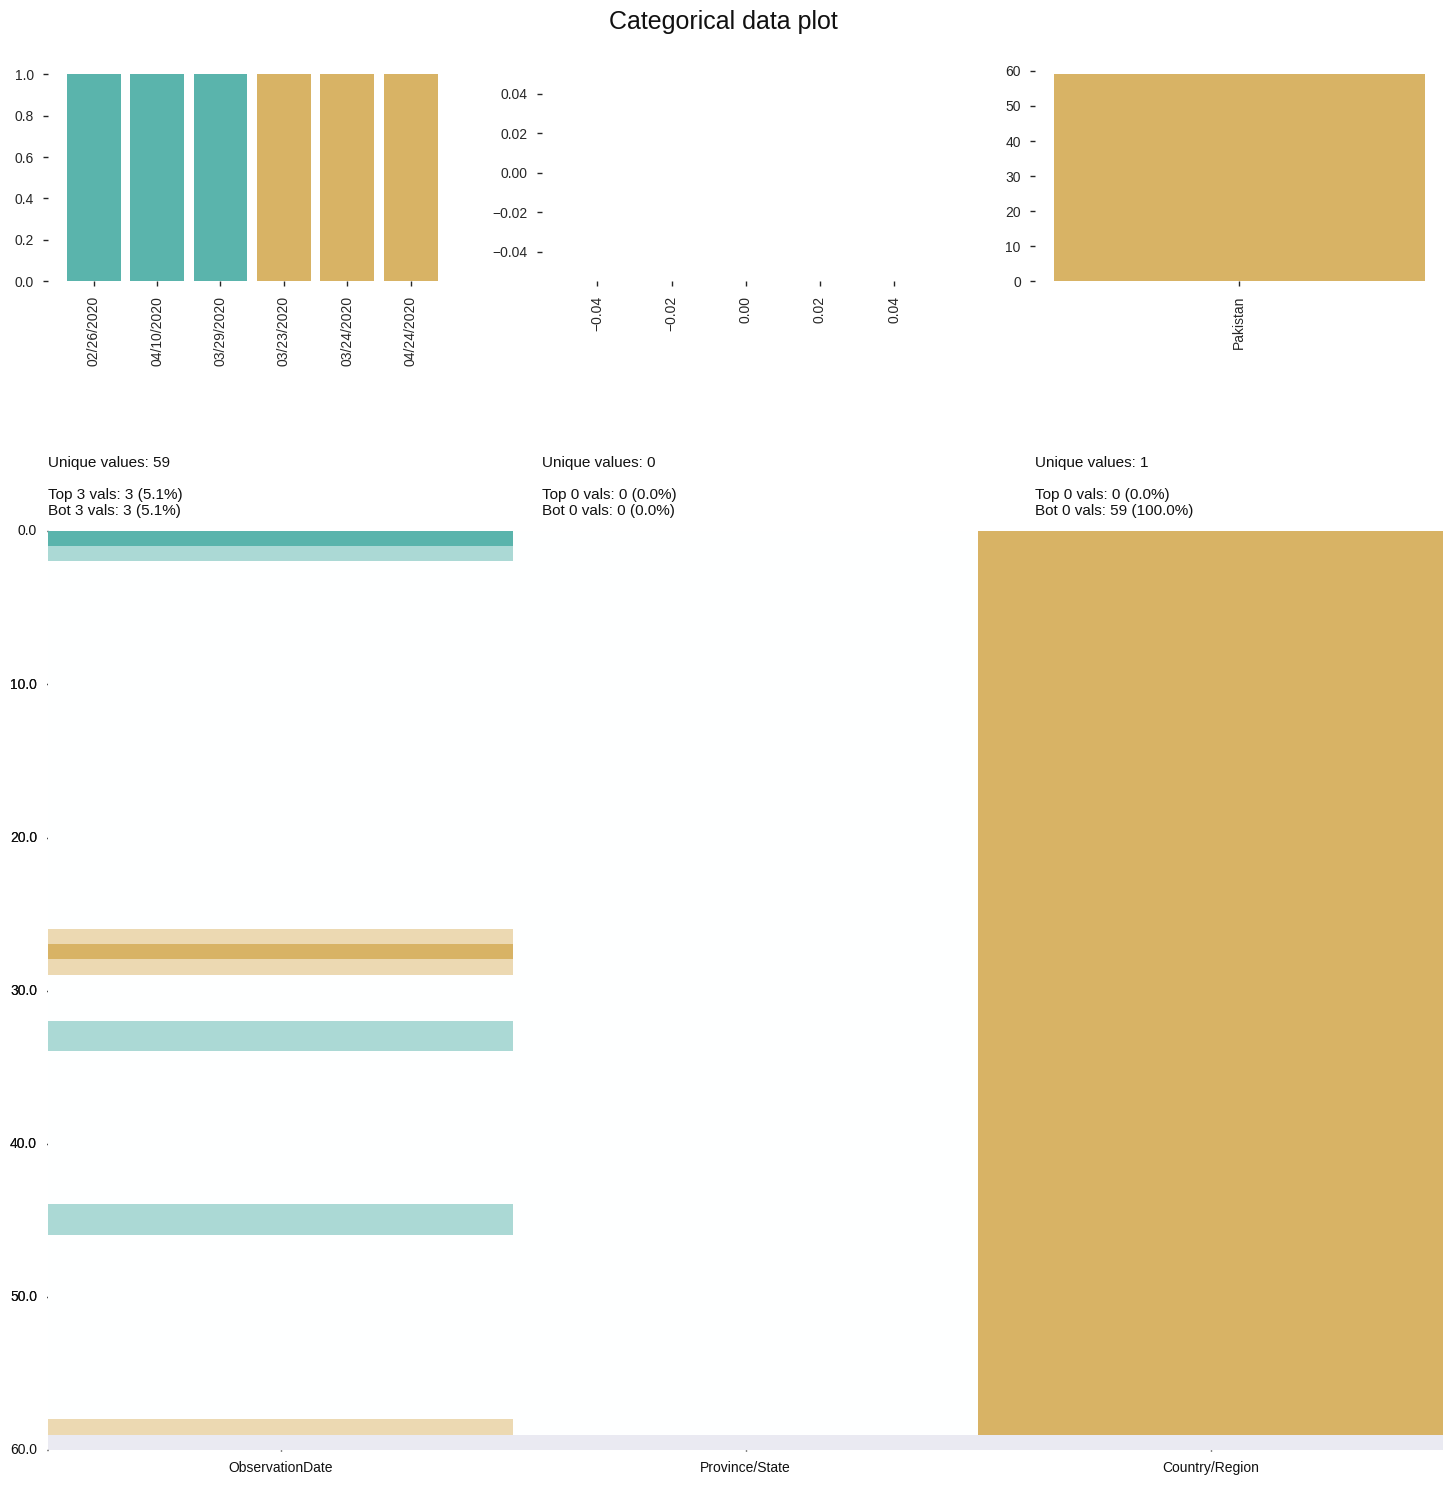

In [146]:
klib.cat_plot(df) # returns a visualization of the number and frequency of categorical features

In [147]:
klib.corr_mat(df) # returns a color encoded correlation matrix

,Confirmed,Deaths,Recovered
Confirmed,1.00,0.99,0.97
Deaths,0.99,1.00,0.98
Recovered,0.97,0.98,1.00


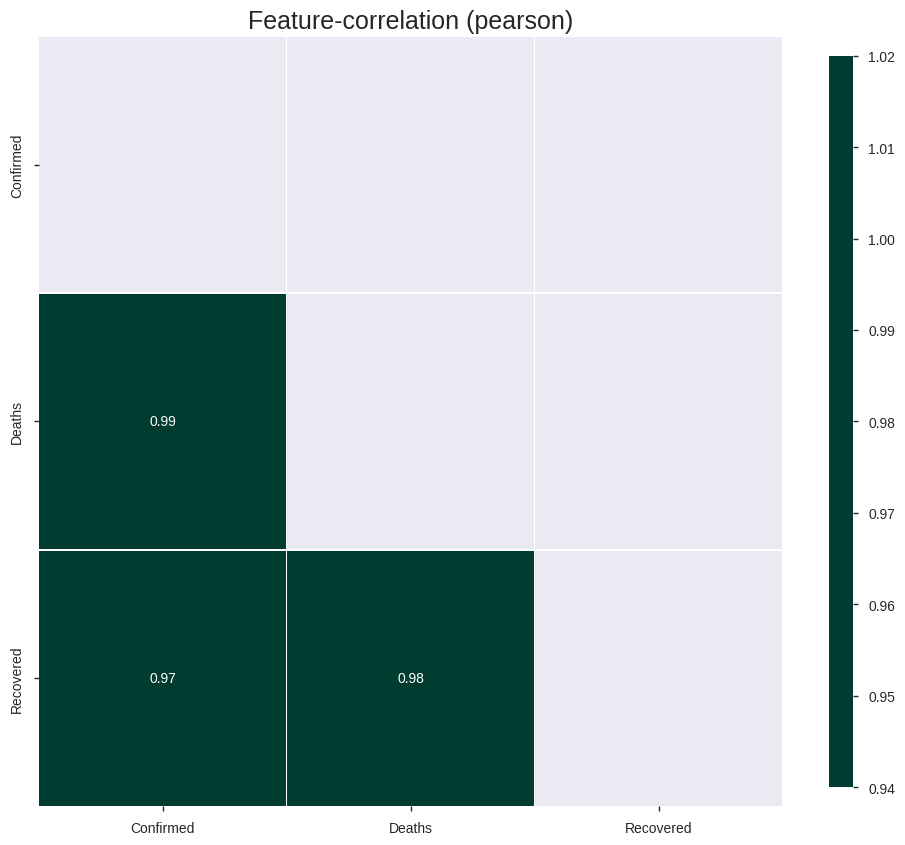

In [148]:
klib.corr_plot(df) # returns a color coded heatmap

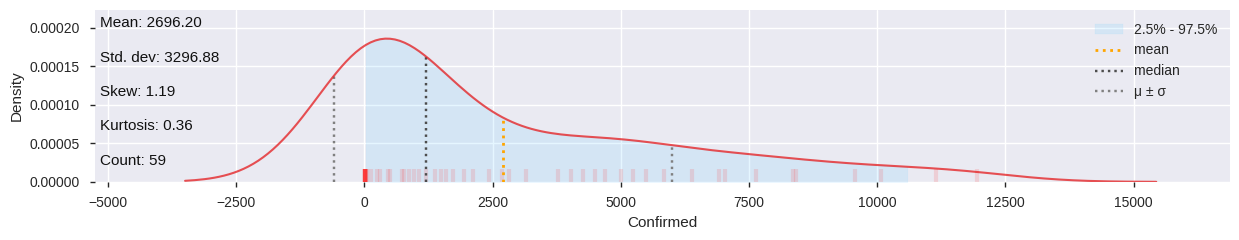

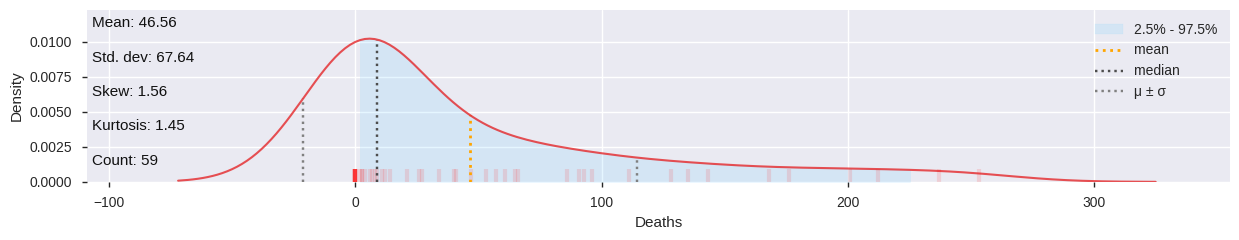

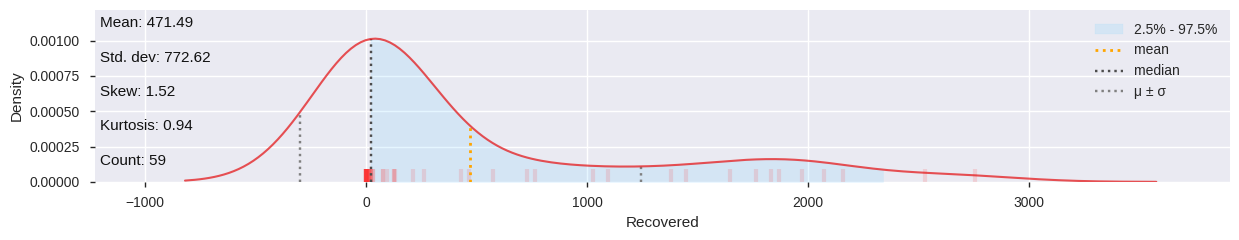

In [149]:
klib.dist_plot(df) # returns a distribution plot for every numeric feature

GridSpec(6, 6)

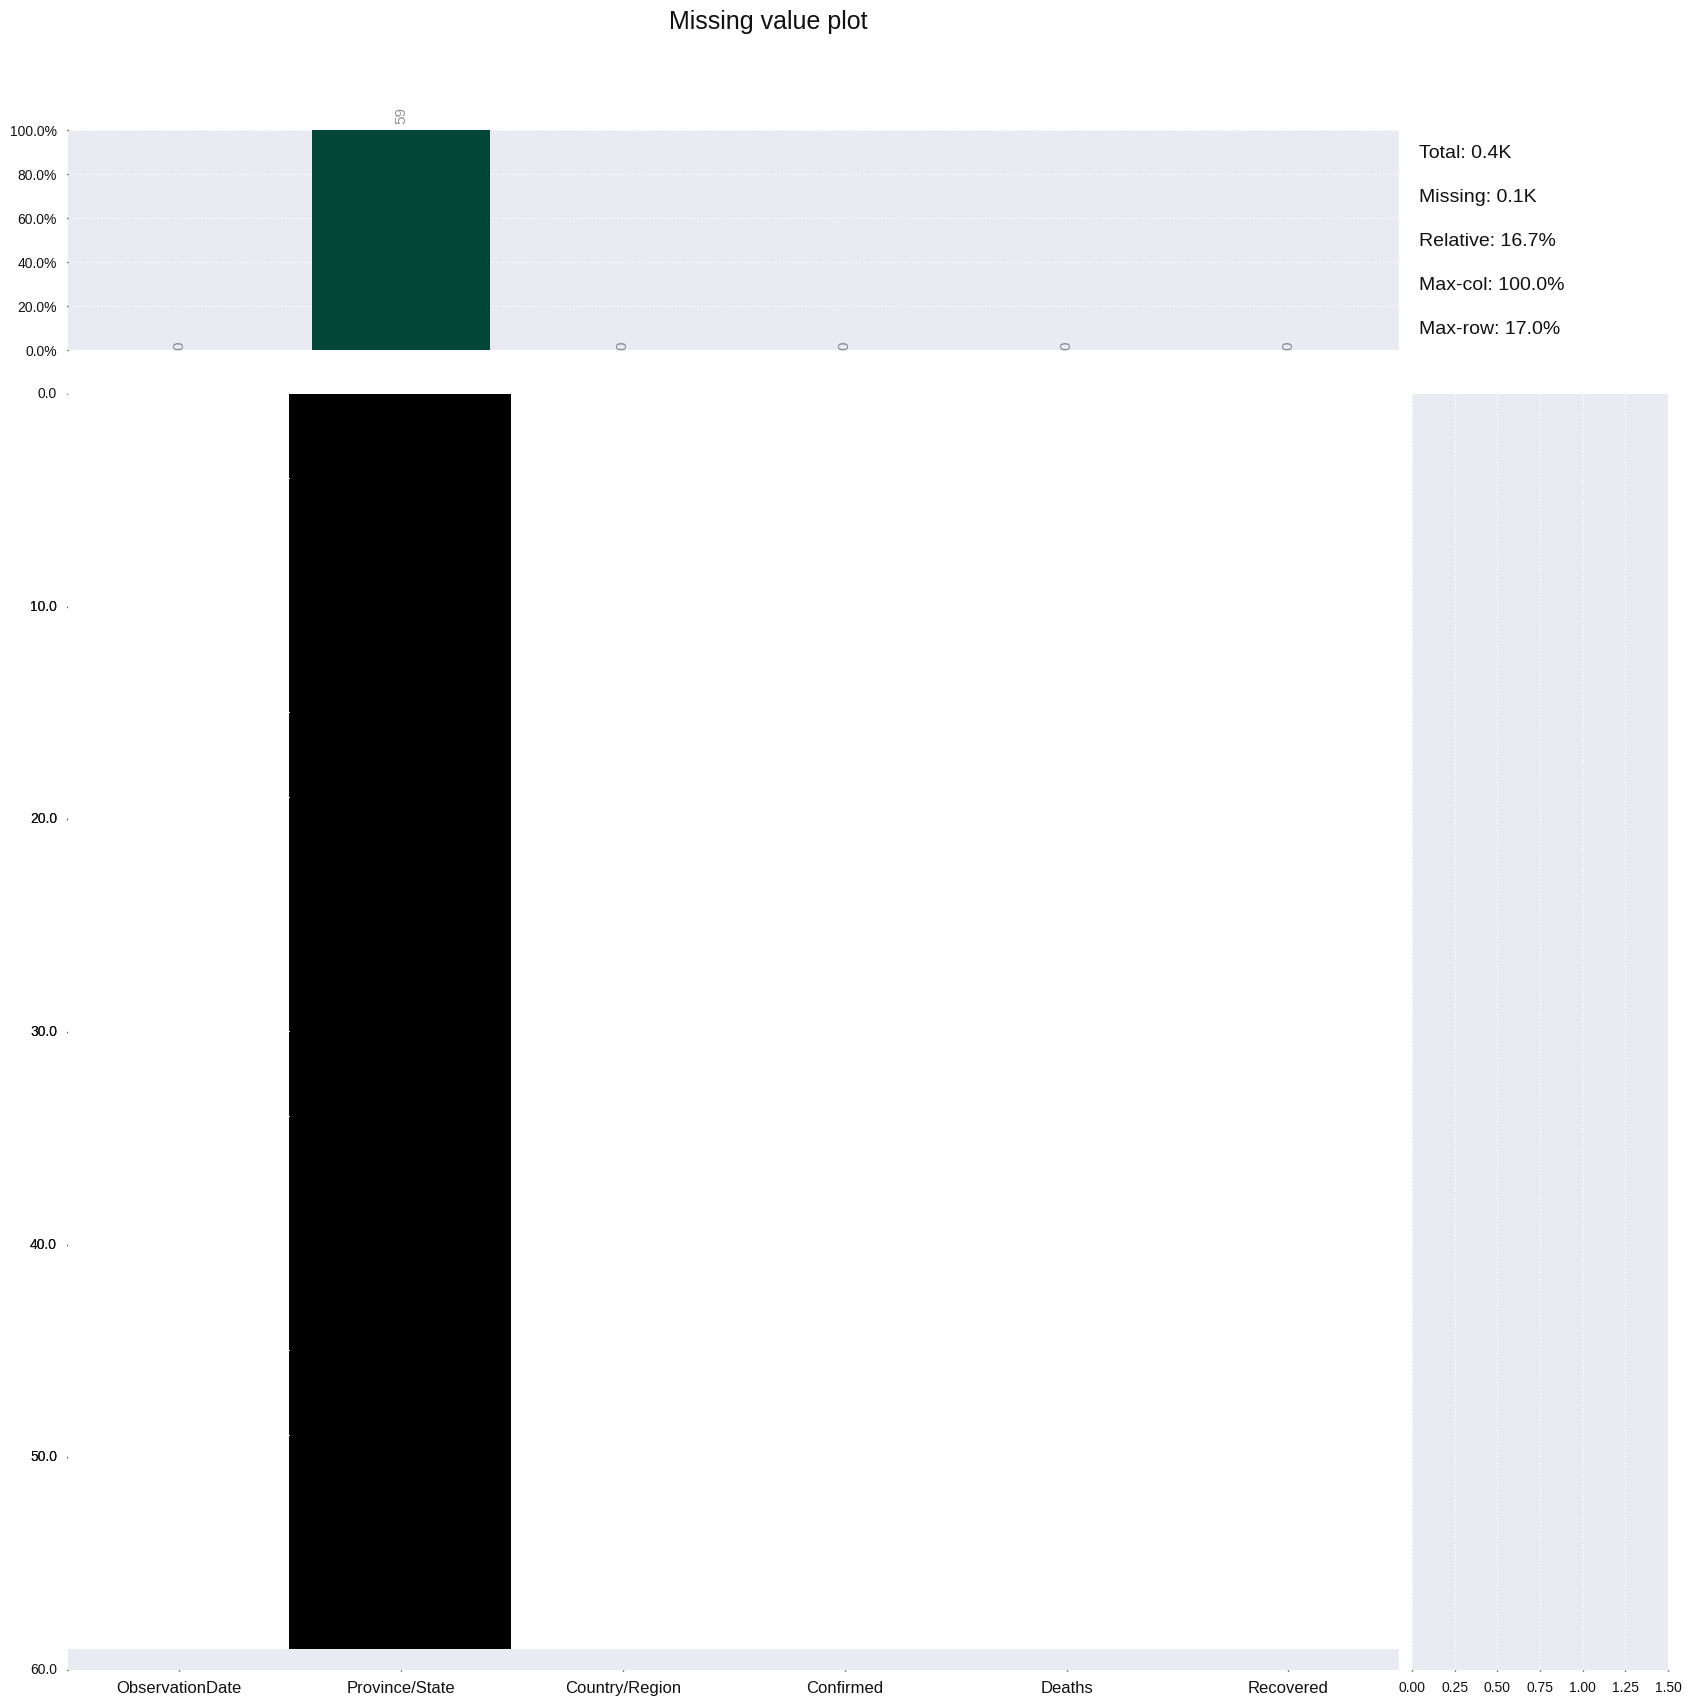

In [150]:
klib.missingval_plot(df) # returns a figure containing information about missing values

GridSpec(6, 6)

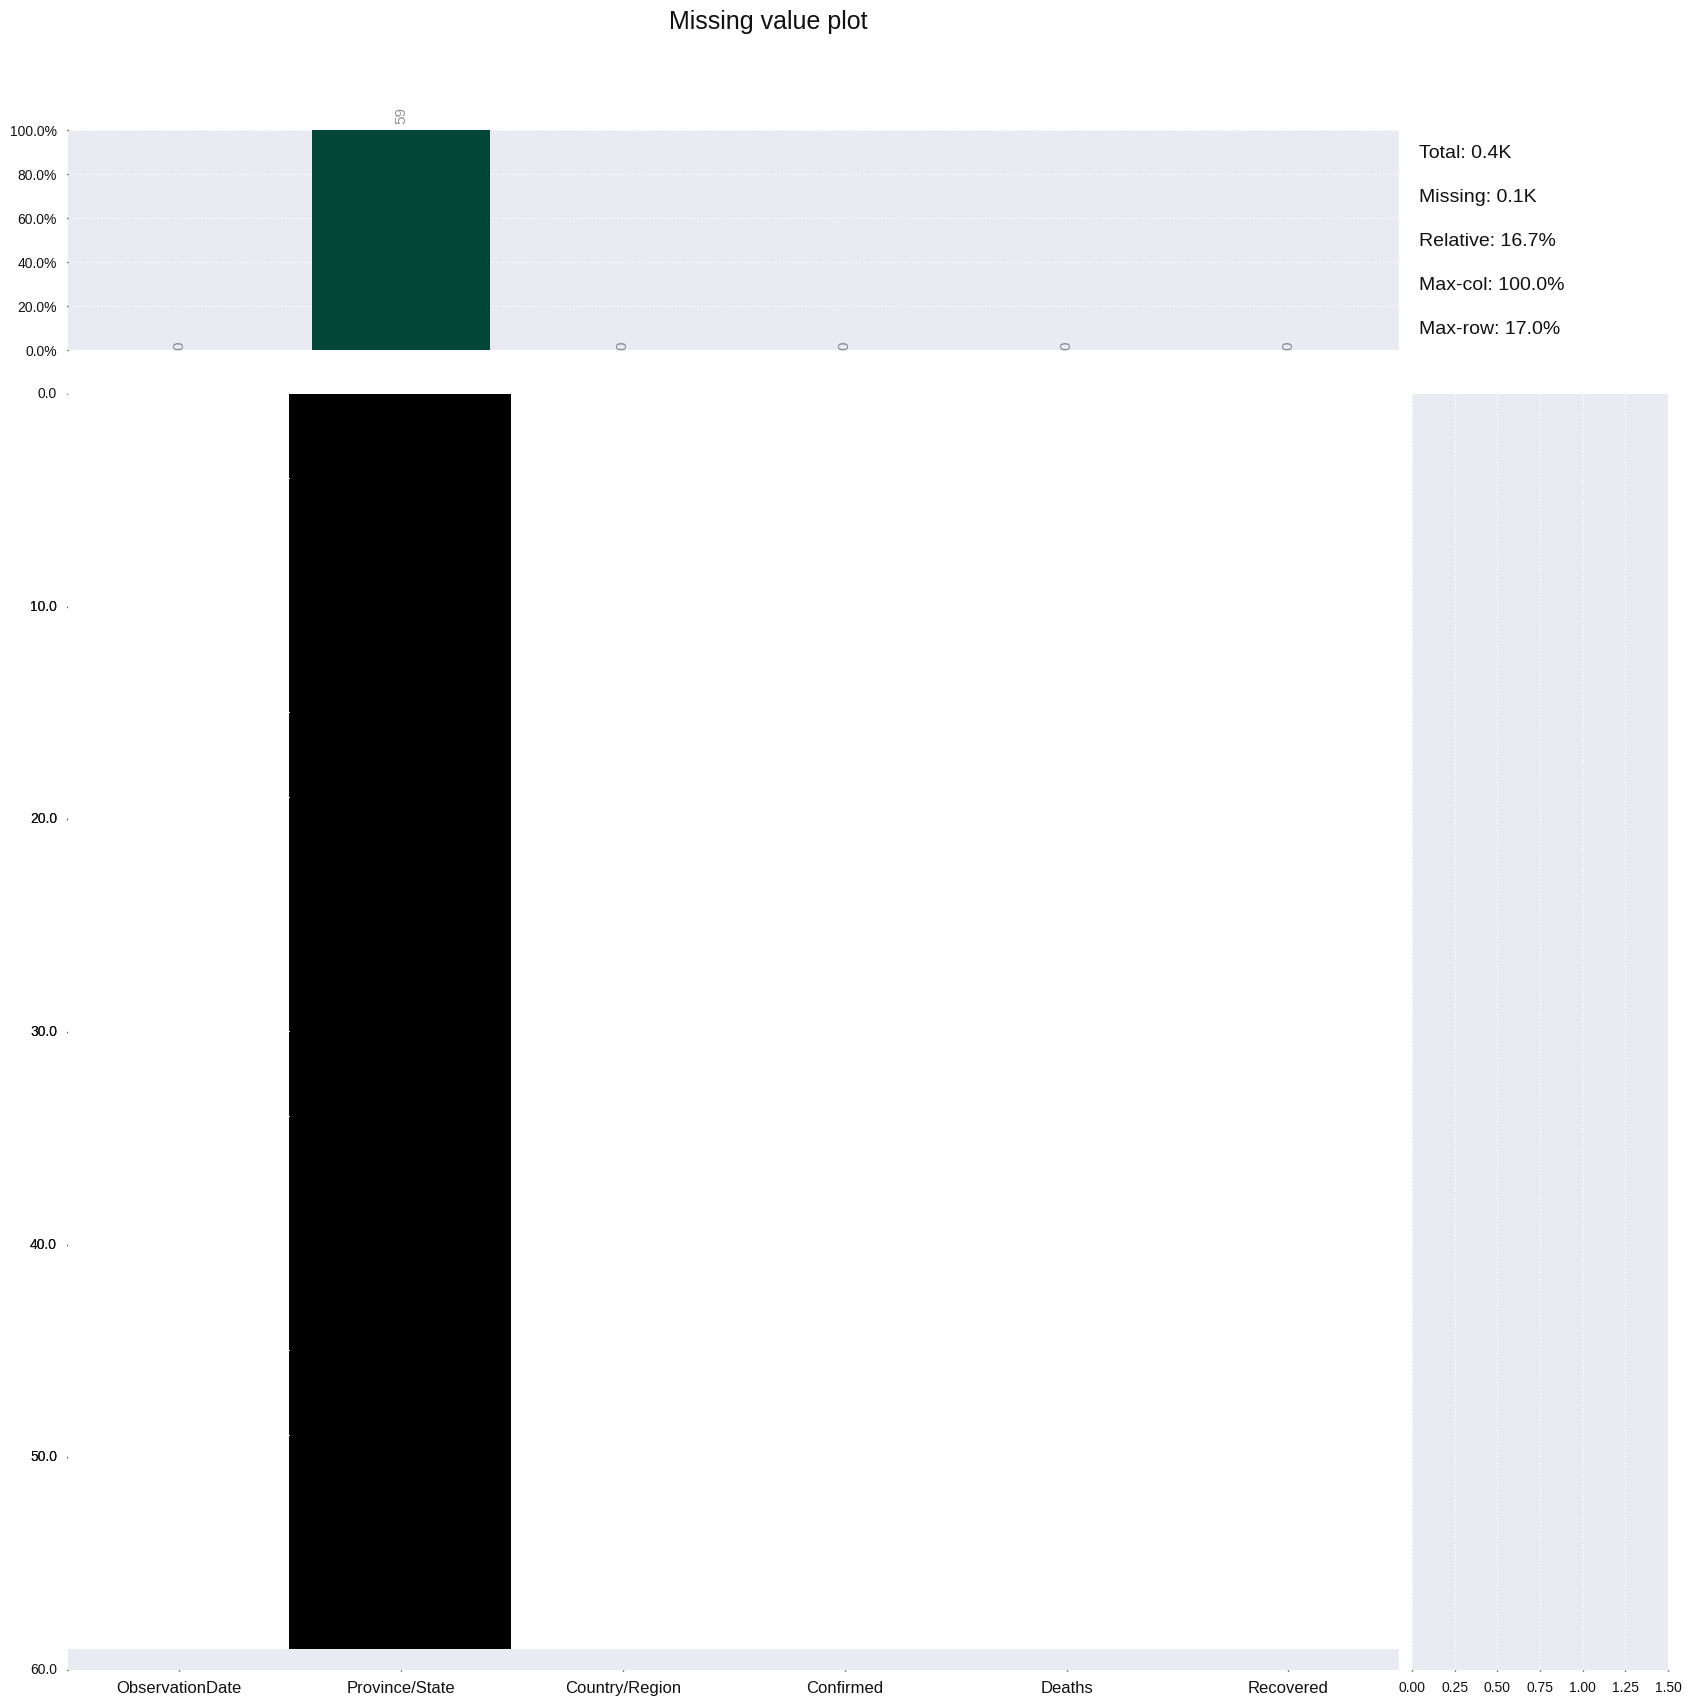

In [151]:
klib.missingval_plot(df)